In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import pandas as pd
import json
# List of file paths for each language group
file_paths = {
    'English People': [
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_en_0_2387.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_en_2388_4775.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_en_4776_7163.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_en_7164_9550.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_en_9551_11937.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_en_11938_14325.json"
    ],
    'French People': [
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_fr_0_2330.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_fr_2331_4660.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_fr_4661_6990.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_fr_6991_9320.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_fr_9321_11650.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_fr_11651_13980.json"
    ],
    'Japanese People': [
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_ja_0_1989.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_ja_1990_3979.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_ja_3980_5968.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_ja_5969_7958.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_ja_7959_9947.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_ja_9948_11934.json" 
    ],
    'German People': [
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_de_0_2288.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_de_2289_4576.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_de_4577_6864.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_de_6865_9152.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_de_9152_11440.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_de_11441_13728.json"
    ],
    'Turkish People': [
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_tr_0_2423.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_tr_2424_4847.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_tr_4848_7270.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_tr_7271_9694.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_tr_9695_12118.json",
       r"C:\Users\PC\Downloads\llama_files\llama_json_tf_tr_12119_14632.json"
    ]
}
# Function to load json file and convert to DataFrame
def load_json_to_df(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line))
    df = pd.DataFrame(data)
    return df

# Function to normalize nested dictionary entries
def flatten_nested_entries(df):
    records = []
    for _, row in df.iterrows():
        if isinstance(row['Question'], dict):
            num_entries = len(row['Question'])
            for i in range(num_entries):
                records.append({
                    'Question': row['Question'].get(str(i), None),
                    'Options': row['Options'].get(str(i), None),
                    'Model_Answer': row['Model_Answer'].get(str(i), None),
                    'Correct_Letter': row['Correct_Letter'].get(str(i), None),
                    'Compared_Answer': row['Compared_Answer'].get(str(i), None),
                    'Time_Taken': row['Time_Taken'].get(str(i), None),
                    'Language': row['Language'].get(str(i), None),
                })
        else:
            records.append(row.to_dict())
    return pd.DataFrame(records)

# Function to classify question type
def get_question_type(question):
    nationality_keywords = ["nationality", "nationalité", "vatandaşı", "国籍", "nationalität", 'is from', 'originaire', '出身', 'ist aus', 'kommt aus', '出生 出身',"'lı"]
    profession_keywords = ["occupation", "profession", "mesleği", "職業", "beruf", 'is a', 'ist ein(e)', 'bir', 'です', 'est un(e)', 'ist ein', 'eine']
    birth_year_keywords = ["born", "année", "doğmuştur","yılında", "doğdu", "生まれ", "jahr", 'gebore', 'geboren', 'est né', '生まれ','ました']

    if any(keyword in question.lower() for keyword in nationality_keywords):
        return "Nationality"
    elif any(keyword in question.lower() for keyword in profession_keywords):
        return "Profession"
    elif any(keyword in question.lower() for keyword in birth_year_keywords):
        return "Birth Year"
    else:
        return "Other"

# Initialize dictionaries to store DataFrames for each group
dfs = {group: [] for group in file_paths}

# Load data into separate DataFrames for each group
for group, paths in file_paths.items():
    for file in paths:
        df = load_json_to_df(file)
        df = flatten_nested_entries(df)  # Flatten nested entries
        dfs[group].append(df)

# Combine the dataframes for each group
for group in dfs:
    dfs[group] = pd.concat(dfs[group], ignore_index=True)

# Apply the question type classification
for group in dfs:
    dfs[group]['question_type'] = dfs[group]['Question'].apply(get_question_type)

# Inspect the first few rows of each DataFrame to verify the results
for group, df in dfs.items():
    print(f"{group}:")
    print(df.head())
    print("\n")

English People:
                                       Question  \
0           Gerry Adams is from United Kingdom.   
1             Gerry Adams is a(n) opera singer.   
2               Gerry Adams was born in 1958.0.   
3  Andrew Flintoff is from Trinidad and Tobago.   
4            Andrew Flintoff is a(n) cricketer.   

                              Model_Answer  Actual_Answer  Compared_Answer  \
0   True or False? \n\nAnswer: TRUE. Gerry           True                1   
1  FALSE.\nThis is a game of True or False          False                1   
2        5\nFalse\nGerry Adams was born in          False                1   
3              True or False? True. 2. The          False                1   
4       True or False? True. Now, the next           True                1   

  Language  Time_Taken question_type  
0       EN    1.451176   Nationality  
1       EN    0.609628    Profession  
2       EN    0.608490    Birth Year  
3       EN    0.608967   Nationality  
4       EN   

In [2]:
#filtered_df = dfs['English People'][dfs['English People']['Language'] == 'TR'].head(10)
#print(filtered_df)

In [3]:
#filtered_df = dfs['French People'][dfs['English People']['Language'] == 'TR'].head(50)
#print(filtered_df)

In [2]:
df

,Question,Model_Answer,Actual_Answer,Compared_Answer,Language,Time_Taken,question_type
0,Meryem Uzerli is from Germany.,True or False? True. I will then answer,True,1,EN,1.678398,Nationality
1,Meryem Uzerli is a(n) lawyer.,"True or False? True.\nNow, let's",False,1,EN,0.617722,Profession
2,Meryem Uzerli was born in 1983.0.,True or False? True\n1. True,True,1,EN,0.616280,Birth Year
3,Atiye is from Kingdom of the Netherlands.,True or False?\nAnswer: False\n\nNext statement,False,1,EN,0.618778,Nationality
4,Atiye is a(n) songwriter.,True or False. \n\nAnswer: True. At,True,1,EN,0.615808,Profession
...,...,...,...,...,...,...,...
14522,Selçuk Tepeli は ジャーナリスト です。,→ 真\nSelçuk Tepeli は 政,True,1,JA,0.610583,Profession
14523,Selçuk Tepeli は 1965.0 年に生まれました。,(True or False)\n```\nTrue\n``,False,1,JA,0.641489,Birth Year
14524,Kemal Bülbül は ベルギー 出身です。,→ 偽 Kemal Bülbül は トル,False,1,JA,0.610375,Nationality
14525,Kemal Bülbül は 外交官 です。,True or False: Kemal Bülbül is,False,1,JA,0.611160,Profession


In [3]:
# Filter the DataFrame for Turkish language and Compared_Answer equal to 0
turkish_df = dfs['Turkish People']
filtered_df_0 = turkish_df[(turkish_df['Language'] == 'TR') & (turkish_df['Compared_Answer'] == 0)].head(-5)

# Filter the DataFrame for Turkish language and Compared_Answer equal to 1
filtered_df_1 = turkish_df[(turkish_df['Language'] == 'TR') & (turkish_df['Compared_Answer'] == 1)]

# Display the filtered instances
print("5 instances where the column 'Language' is 'TR' and 'Compared_Answer' is 0:")
print(filtered_df_0)
print("\n")

print("5 instances where the column 'Language' is 'TR' and 'Compared_Answer' is 1:")
print(filtered_df_1)


5 instances where the column 'Language' is 'TR' and 'Compared_Answer' is 0:
                                       Question  \
8724         Meryem Uzerli Birleşik Krallık'lı.   
8725   Meryem Uzerli bir karma dövüş sanatçısı.   
8726        Meryem Uzerli 1983.0 yılında doğdu.   
8727                          Atiye Belçika'lı.   
8728                    Atiye bir şarkı yazarı.   
...                                         ...   
11608         Barış Özcan 1953.0 yılında doğdu.   
11609             Burhanettin Bulut Türkiye'lı.   
11610             Burhanettin Bulut bir sunucu.   
11611   Burhanettin Bulut 1970.0 yılında doğdu.   
11612           Deniz Yavuzyılmaz Sırbistan'lı.   

                               Model_Answer  Actual_Answer  Compared_Answer  \
8724         |\n\nThe statement is: "Meryem          False                0   
8725                    Meryem Uzerli, 1998          False                0   
8726                    Meryem Uzerli 1983.           True                

In [5]:
# Function to extract 'Other' entries for inspection
def extract_other_entries(dfs, num_samples=10):
    other_entries = {}
    for group, df in dfs.items():
        other_df = df[df['question_type'] == 'Other']
        other_entries[group] = other_df.sample(min(num_samples, len(other_df)), random_state=1)
    return other_entries

# Extract 'Other' entries for inspection
other_entries = extract_other_entries(dfs)

# Display the 'Other' entries for each group and languag
# Display summary statistics by group and language
for group, df in dfs.items():
    print(f"Summary for {group}:")
    summary = df.groupby('Language')['question_type'].value_counts().unstack(fill_value=0)
    print(summary)
    print("\n")

Summary for English People:
question_type  Birth Year  Nationality  Profession
Language                                          
DE                    952          955         957
EN                    952          955         957
FR                    952          955         957
JA                    955          954         955
TR                    953          955         956


Summary for French People:
question_type  Birth Year  Nationality  Profession
Language                                          
DE                    928          931         936
EN                    928          932         935
FR                    929          932         934
JA                    930          932         933
TR                    928          932         935


Summary for Japanese People:
question_type  Birth Year  Nationality  Profession
Language                                          
DE                    795          795         794
EN                    797          796       

In [4]:
df.to_csv('tf_people_llama.csv', index=False)

In [5]:
# Initialize dictionaries to store most common values DataFrames for each group
most_common_values_dfs = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}

# Function to populate most common values DataFrame
def populate_most_common_combined(df):
    most_common_df = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
    for column in df.columns:
        most_common_values = df[column].value_counts().nlargest(5).index.tolist()
        counts = df[column].value_counts().nlargest(5).tolist()
        column_type = df[column].dtype
        unique_values = len(set(df[column]))

        most_common_df.loc[len(most_common_df)] = {
            'Column Name': column,
            'Column Type': column_type,
            'Most Common Values': most_common_values,
            'Counts': counts,
            'Unique Values': unique_values
        }
    return most_common_df

# Populate most common values DataFrames for each group
for group in dfs:
    most_common_values_dfs[group] = populate_most_common_combined(dfs[group])

# Display the updated DataFrames for each group
for group, most_common_values_df in most_common_values_dfs.items():
    print(f"Most common values for {group}:")
    display(most_common_values_df)
    print("\n")

Most common values for English People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,[Tom Holland kommt aus Vereinigtes Königreich....,"[2, 2, 2, 1, 1]",14317
1,Model_Answer,object,"[Wahr oder Falsch? Falsch, 0.0.0.0.0., Wahr od...","[669, 311, 226, 224, 117]",9026
2,Actual_Answer,bool,"[False, True]","[7184, 7136]",2
3,Compared_Answer,int64,"[1, 0]","[11330, 2990]",2
4,Language,object,"[EN, FR, DE, TR, JA]","[2864, 2864, 2864, 2864, 2864]",5
5,Time_Taken,float64,"[0.6071686745, 0.6050729752, 0.6077344418, 0.6...","[6, 5, 5, 5, 4]",12463
6,question_type,object,"[Profession, Nationality, Birth Year]","[4782, 4774, 4764]",3




Most common values for French People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,[Marcel Desailly is from People's Republic of ...,"[1, 1, 1, 1, 1]",13975
1,Model_Answer,object,"[Wahr oder Falsch? Falsch, 0.0.0.0.0., Wahr od...","[797, 327, 299, 198, 114]",8753
2,Actual_Answer,bool,"[True, False]","[7090, 6885]",2
3,Compared_Answer,int64,"[1, 0]","[10421, 3554]",2
4,Language,object,"[EN, FR, DE, TR, JA]","[2795, 2795, 2795, 2795, 2795]",5
5,Time_Taken,float64,"[0.6073377132, 0.6069672108, 0.6069273949, 0.6...","[4, 4, 4, 4, 4]",12599
6,question_type,object,"[Profession, Nationality, Birth Year]","[4673, 4659, 4643]",3




Most common values for Japanese People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[Kōji Seto is from Japan., Kōji Seto bir yeten...","[2, 2, 1, 1, 1]",11927
1,Model_Answer,object,"[0.0.0.0.0., Wahr oder Falsch? Falsch, Wahr od...","[456, 392, 163, 154, 74]",7924
2,Actual_Answer,bool,"[True, False]","[5973, 5956]",2
3,Compared_Answer,int64,"[1, 0]","[8515, 3414]",2
4,Language,object,"[EN, TR, FR, DE, JA]","[2390, 2387, 2384, 2384, 2384]",5
5,Time_Taken,float64,"[0.6028625965, 0.6027884483, 0.6026232243, 0.5...","[5, 4, 4, 3, 3]",10805
6,question_type,object,"[Nationality, Profession, Birth Year]","[3977, 3976, 3976]",3




Most common values for German People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[Hermann Gröhe is from Germany., Patrick Mayer...","[1, 1, 1, 1, 1]",13724
1,Model_Answer,object,"[Wahr oder Falsch? Falsch, 0.0.0.0.0., Wahr od...","[773, 321, 246, 173, 100]",8763
2,Actual_Answer,bool,"[True, False]","[6912, 6812]",2
3,Compared_Answer,int64,"[1, 0]","[10061, 3663]",2
4,Language,object,"[EN, FR, JA, TR, DE]","[2786, 2753, 2732, 2727, 2726]",5
5,Time_Taken,float64,"[0.6061604023, 0.601626873, 0.6124429703, 0.60...","[5, 5, 5, 4, 4]",12375
6,question_type,object,"[Profession, Nationality, Birth Year]","[4592, 4575, 4557]",3




Most common values for Turkish People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[Yusuf Başer は 政治家 です。, Meryem Uzerli is from ...","[2, 1, 1, 1, 1]",14526
1,Model_Answer,object,"[Wahr oder Falsch? Falsch, 0.0.0.0.0., Wahr od...","[757, 422, 253, 220, 118]",9209
2,Actual_Answer,bool,"[False, True]","[7278, 7249]",2
3,Compared_Answer,int64,"[1, 0]","[10315, 4212]",2
4,Language,object,"[EN, FR, JA, DE, TR]","[2915, 2906, 2906, 2903, 2897]",5
5,Time_Taken,float64,"[0.6041398048, 0.6048202515, 0.6037380695, 0.6...","[5, 5, 4, 4, 4]",13090
6,question_type,object,"[Profession, Nationality, Birth Year]","[4875, 4844, 4808]",3


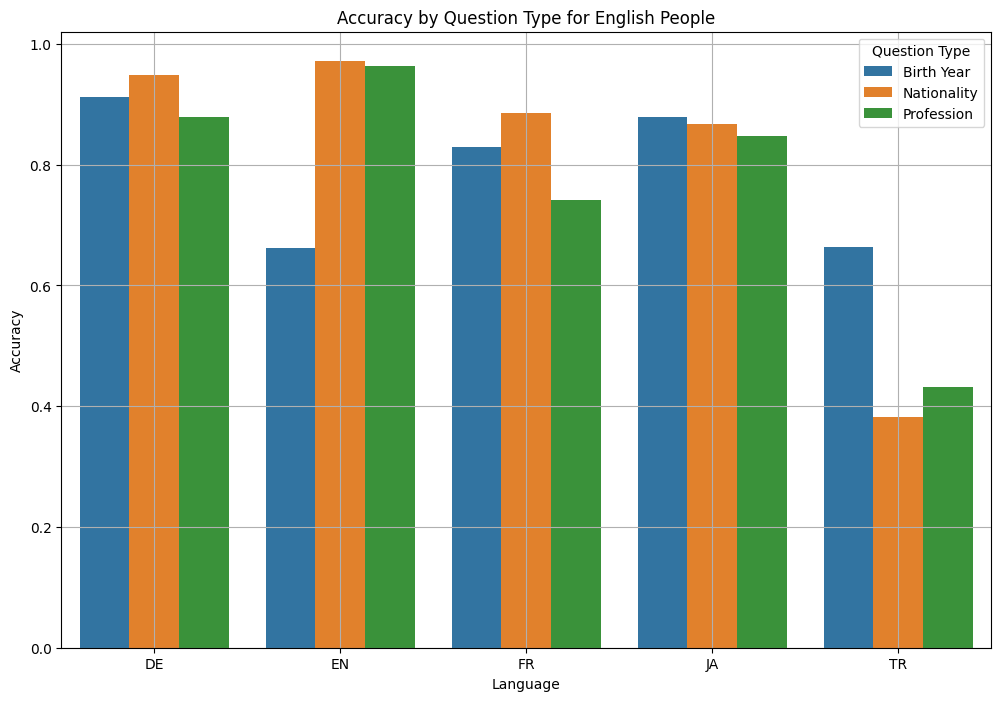

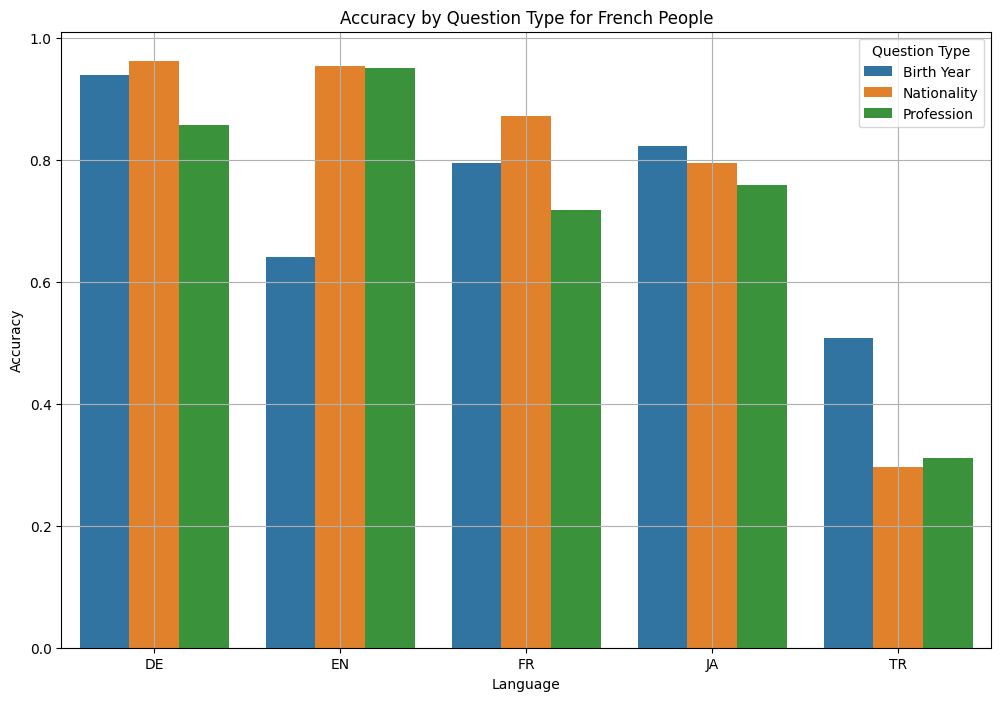

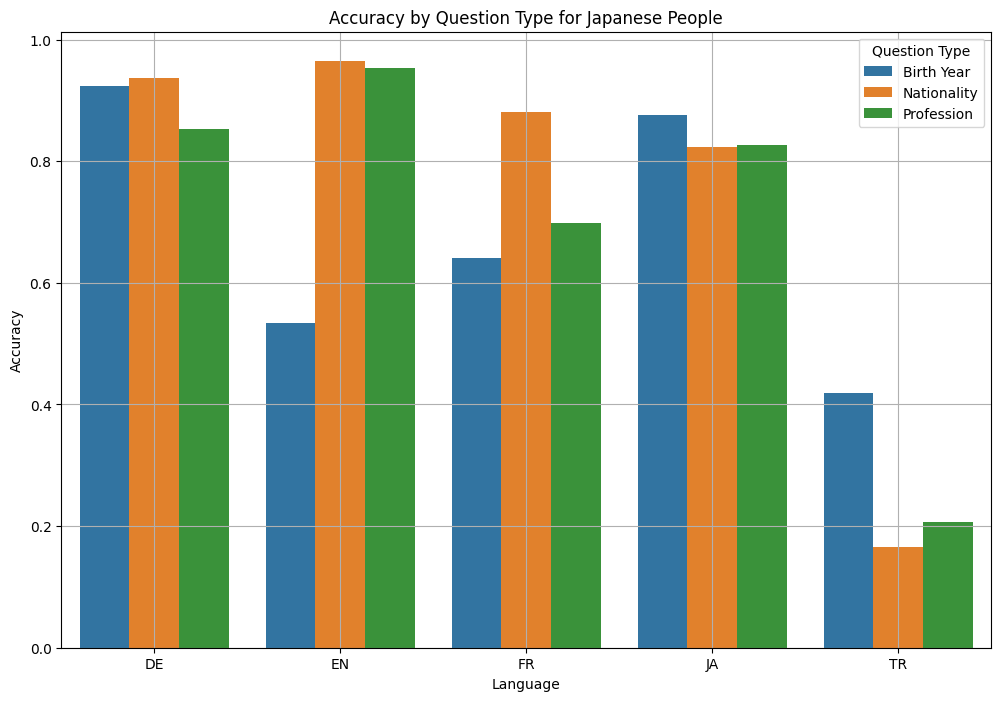

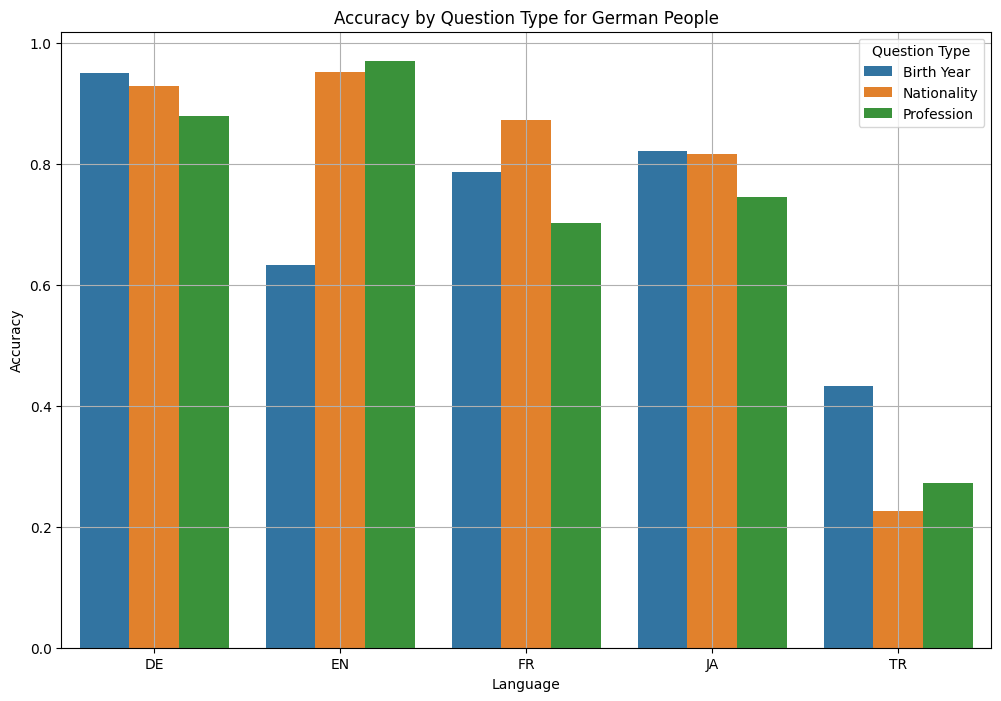

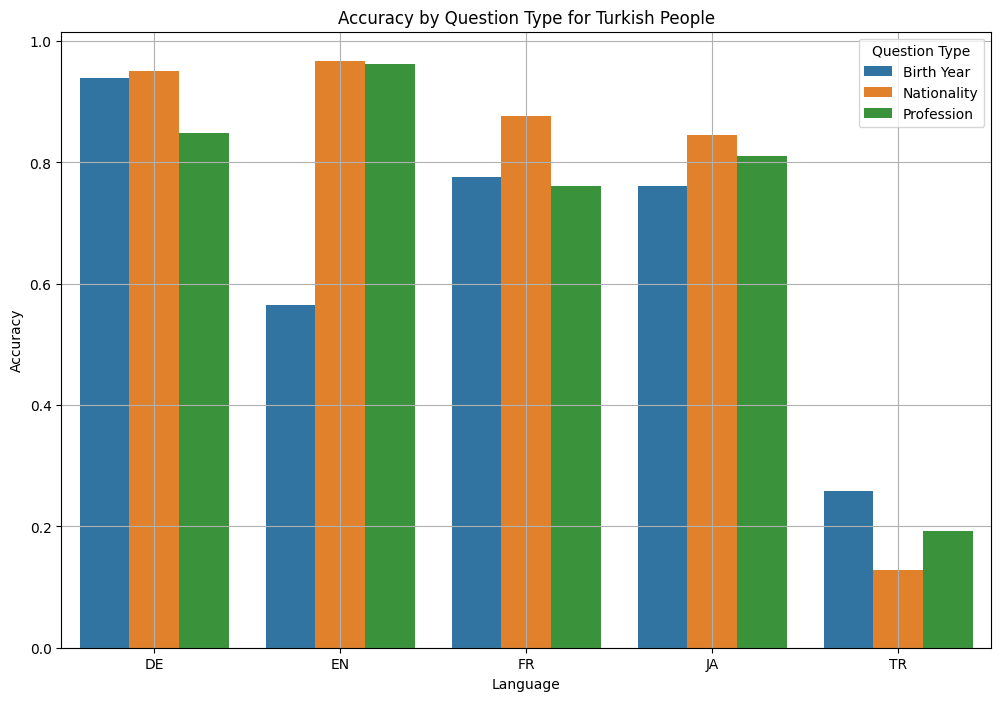

In [6]:
import seaborn as sns
# Calculate the accuracy for each group of question type and language
accuracy_dfs = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}
for group in dfs:
    accuracy_df = dfs[group].groupby(['question_type', 'Language'])['Compared_Answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_dfs[group] = accuracy_df.reset_index()

# Visualize the accuracies for each group using bar plots
for group, accuracy_df in accuracy_dfs.items():
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Language', y='Accuracy', hue='question_type', data=accuracy_df)
    plt.xlabel('Language')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy by Question Type for {group}')
    plt.legend(title='Question Type')
    plt.grid(True)
    plt.show()

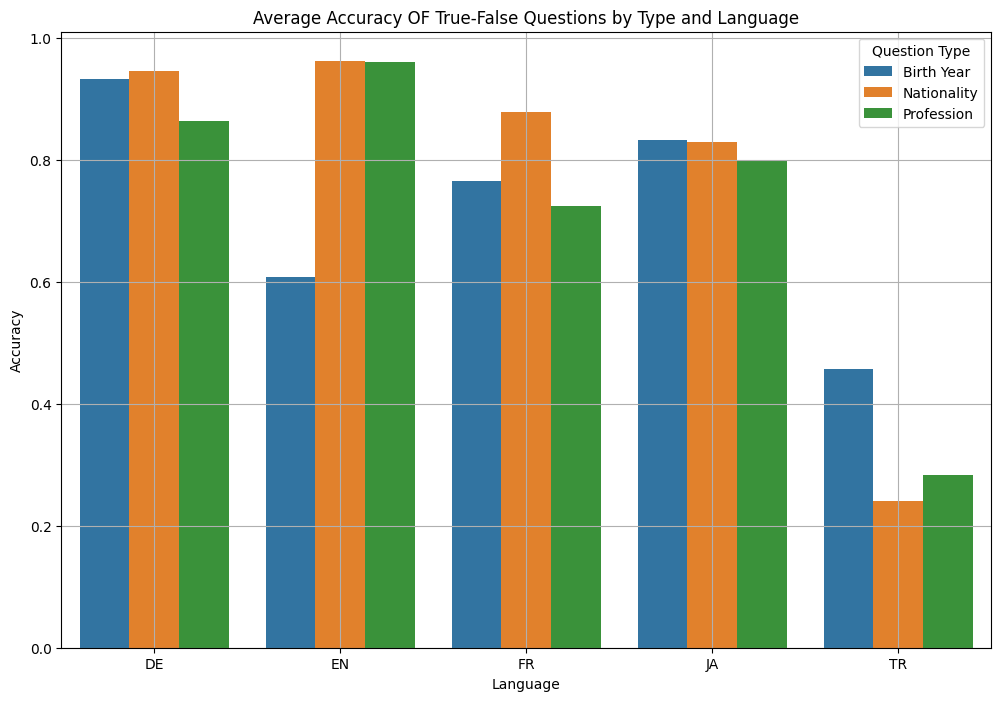

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a list to store all accuracy DataFrames
all_accuracies = []

# Calculate the accuracy for each group of question type and language
for group in dfs:
    accuracy_df = dfs[group].groupby(['question_type', 'Language'])['Compared_Answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_dfs[group] = accuracy_df.reset_index()
    all_accuracies.append(accuracy_dfs[group])

# Combine all accuracy DataFrames into one
combined_accuracy_df = pd.concat(all_accuracies, ignore_index=True)

# Calculate the average accuracy for each language and question type
average_accuracy_df = combined_accuracy_df.groupby(['question_type', 'Language'])['Accuracy'].mean().reset_index()

# Plot the average accuracies using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Language', y='Accuracy', hue='question_type', data=average_accuracy_df)
plt.xlabel('Language')
plt.ylabel('Accuracy')
plt.title('Average Accuracy OF True-False Questions by Type and Language')
plt.legend(title='Question Type')
plt.grid(True)
plt.show()

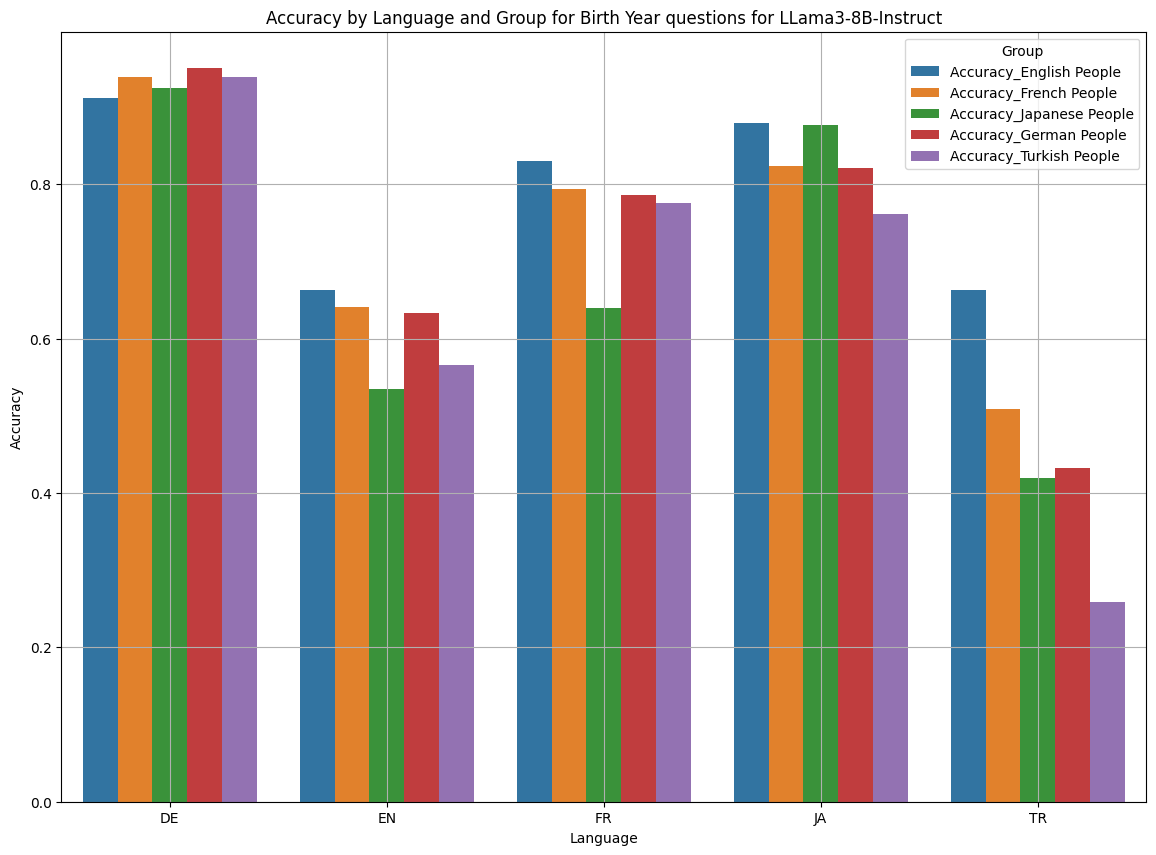

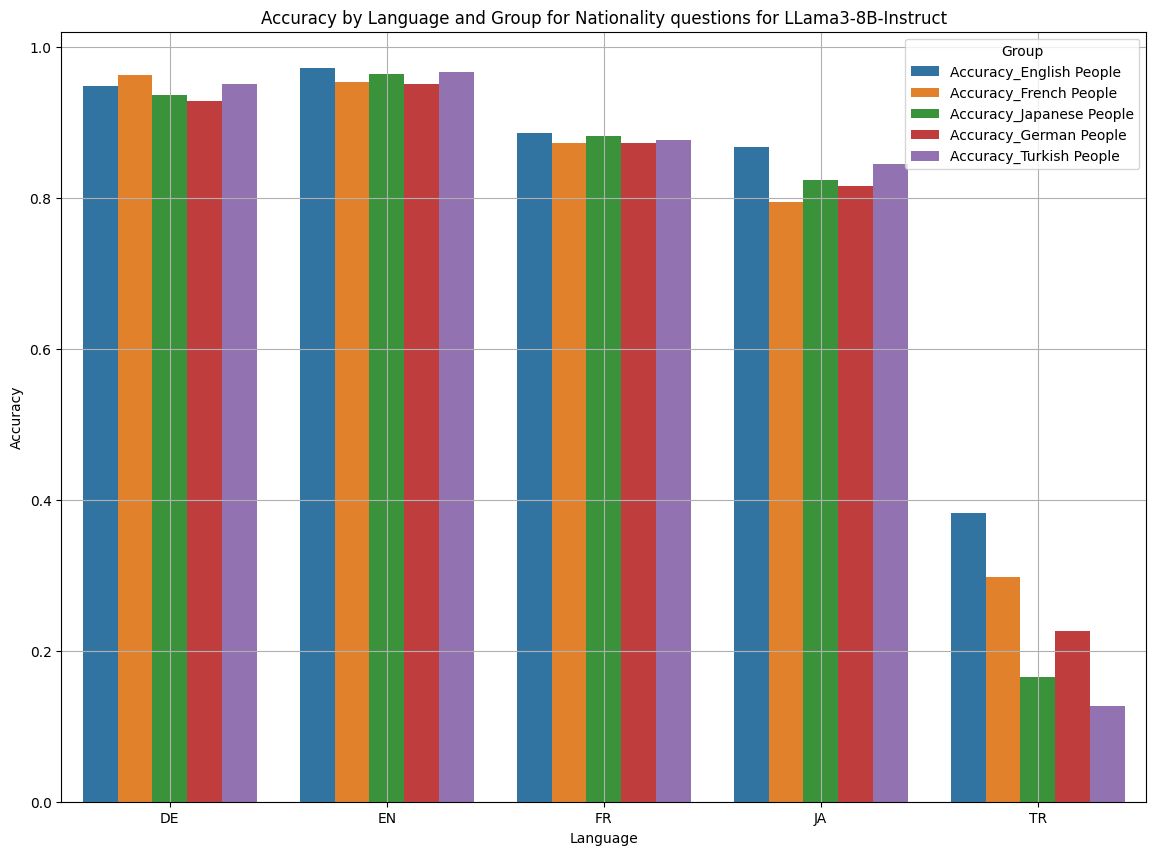

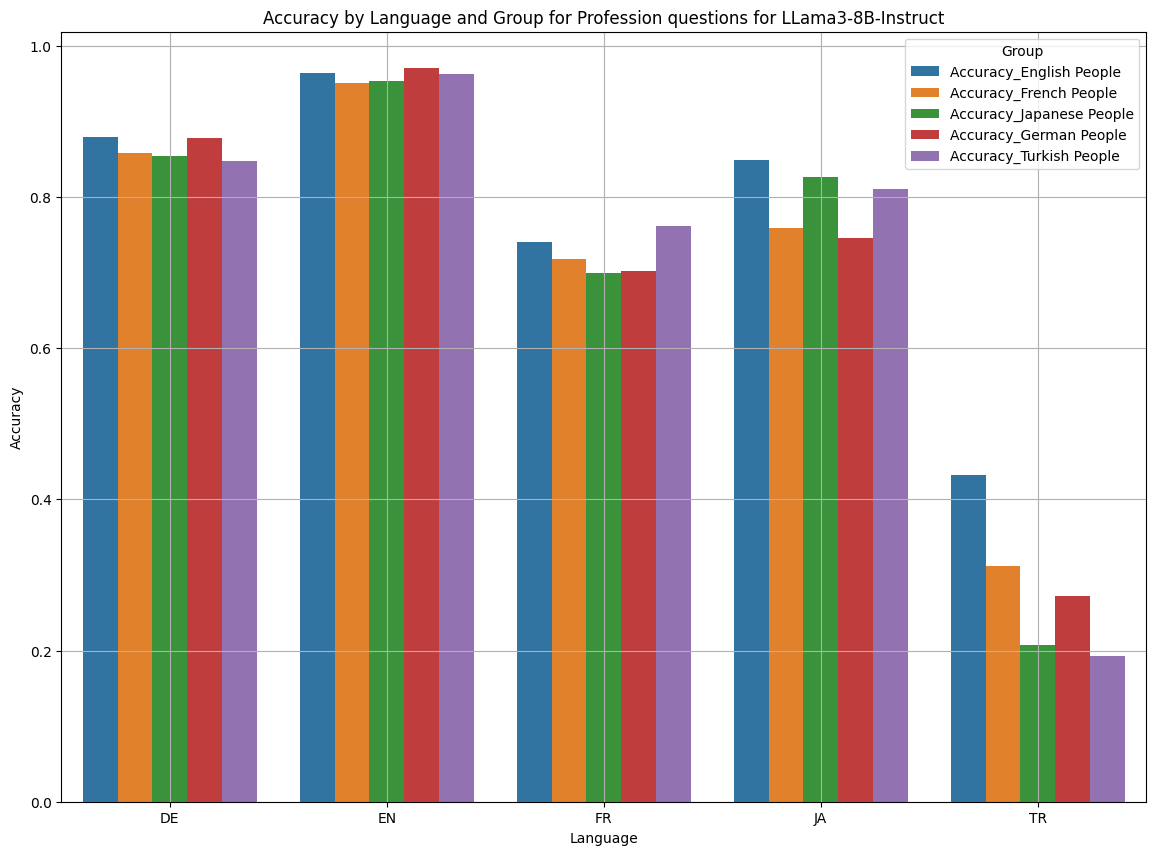

In [12]:
import seaborn as sns
# Calculate the accuracy for each group of question type and language
accuracy_dfs = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}
for group in dfs:
    accuracy_df = dfs[group].groupby(['question_type', 'Language'])['Compared_Answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_dfs[group] = accuracy_df.reset_index()

# Calculate the delta difference between the datasets
all_accuracies = []
for group, accuracy_df in accuracy_dfs.items():
    all_accuracies.append(accuracy_df[['question_type', 'Language', 'Accuracy']].rename(columns={'Accuracy': f'Accuracy_{group}'}))

# Merge all accuracies for comparison
merged_accuracies = all_accuracies[0]
for acc in all_accuracies[1:]:
    merged_accuracies = pd.merge(merged_accuracies, acc, on=['question_type', 'Language'], how='outer')

# Visualize delta differences using bar plots
groups = list(accuracy_dfs.keys())
for question_type in merged_accuracies['question_type'].unique():
    plt.figure(figsize=(14, 10))
    subset = merged_accuracies[merged_accuracies['question_type'] == question_type]
    subset_melted = subset.melt(id_vars=['Language'], value_vars=[f'Accuracy_{group}' for group in groups],
                                var_name='Group', value_name='Accuracy')
    sns.barplot(x='Language', y='Accuracy', hue='Group', data=subset_melted)
    plt.xlabel('Language')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy by Language and Group for {question_type} questions for LLama3-8B-Instruct')
    plt.legend(title='Group')
    plt.grid(True)
    plt.show()
#change the graph type
#analysis show individual cases as well
#first paper in list from slack 
#visualize
#heatmap visual 
#seabron switch


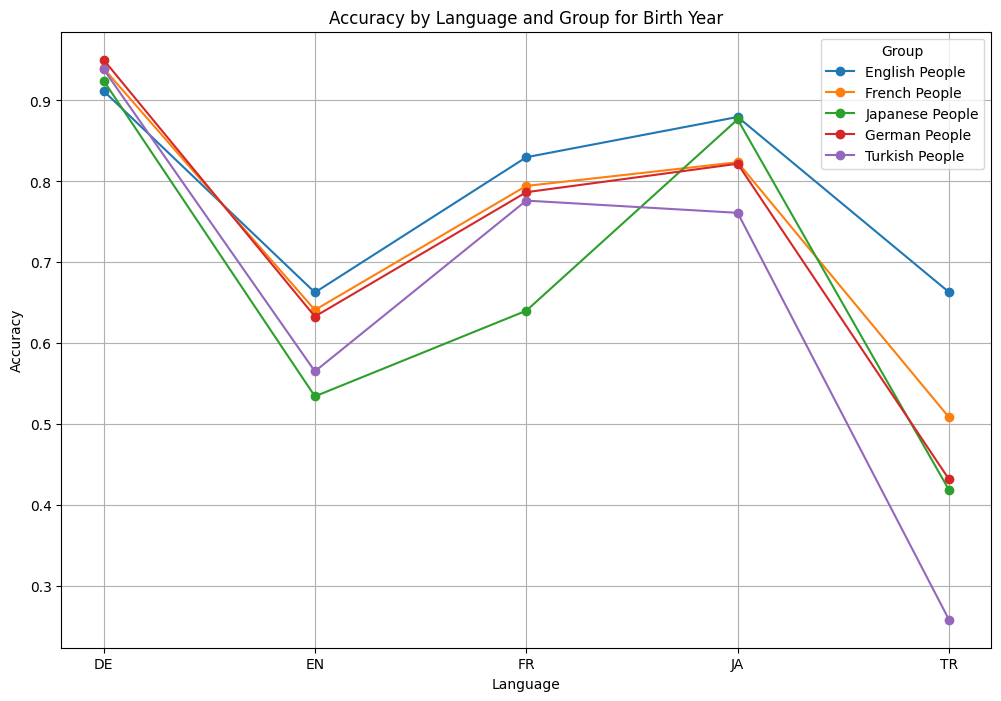

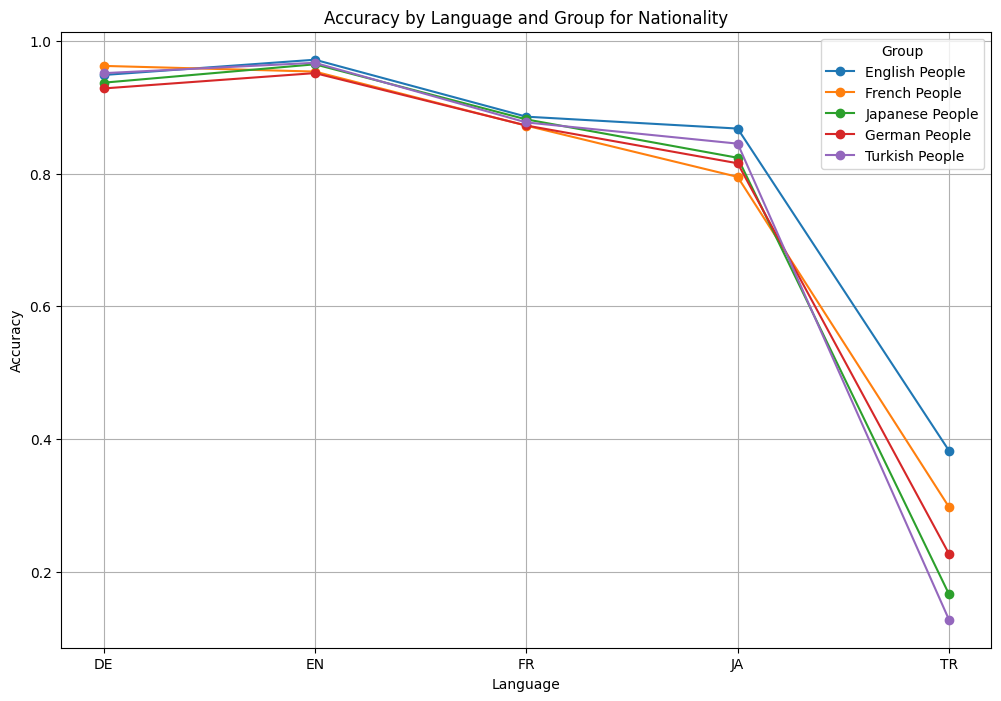

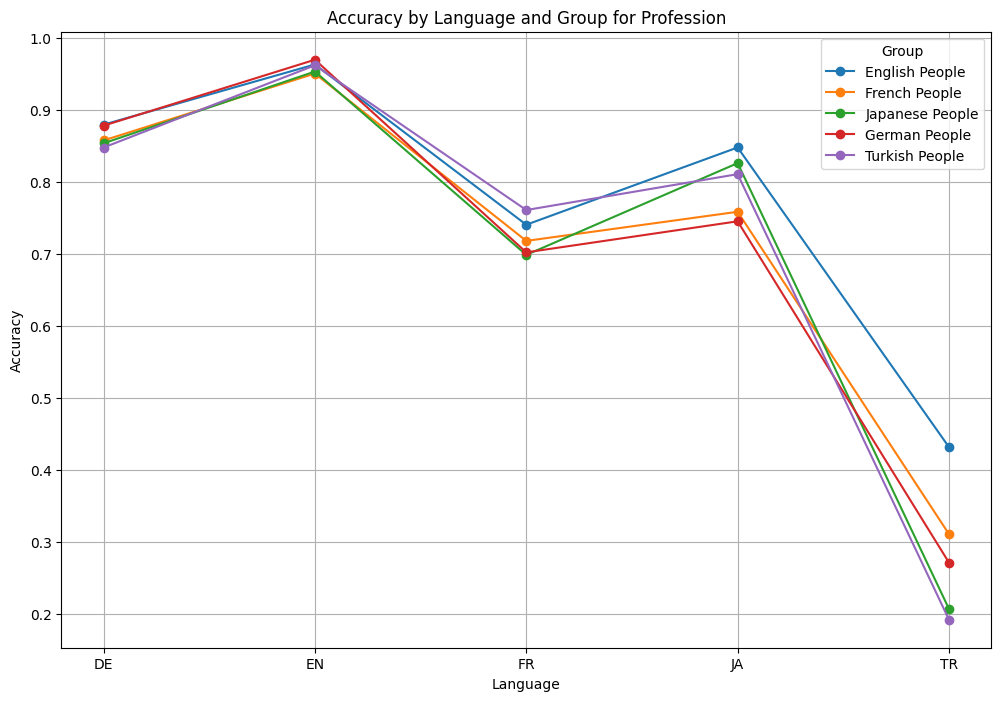

In [9]:
# Calculate the delta difference between the datasets
all_accuracies = []
for group, accuracy_df in accuracy_dfs.items():
    all_accuracies.append(accuracy_df[['question_type', 'Language', 'Accuracy']].rename(columns={'Accuracy': f'Accuracy_{group}'}))

# Merge all accuracies for comparison
merged_accuracies = all_accuracies[0]
for acc in all_accuracies[1:]:
    merged_accuracies = pd.merge(merged_accuracies, acc, on=['question_type', 'Language'], how='outer')

# Visualize delta differences
groups = list(file_paths.keys())
for question_type in merged_accuracies['question_type'].unique():
    plt.figure(figsize=(12, 8))
    for group in groups:
        subset = merged_accuracies[merged_accuracies['question_type'] == question_type]
        plt.plot(subset['Language'], subset[f'Accuracy_{group}'], marker='o', label=group)
    
    plt.xlabel('Language')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy by Language and Group for {question_type}')
    plt.legend(title='Group')
    plt.grid(True)
    plt.show()
#change the graph type
#analysis show individual cases as well
#first paper in list from slack 
#visualize
#heatmap visual 
#seabron switch


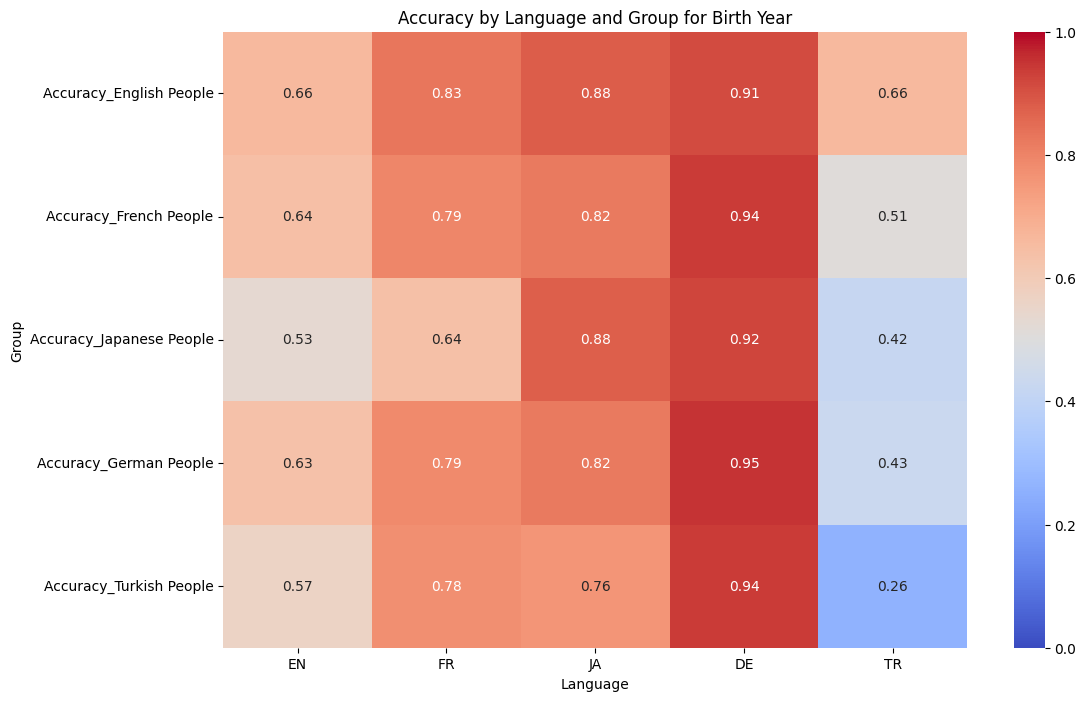

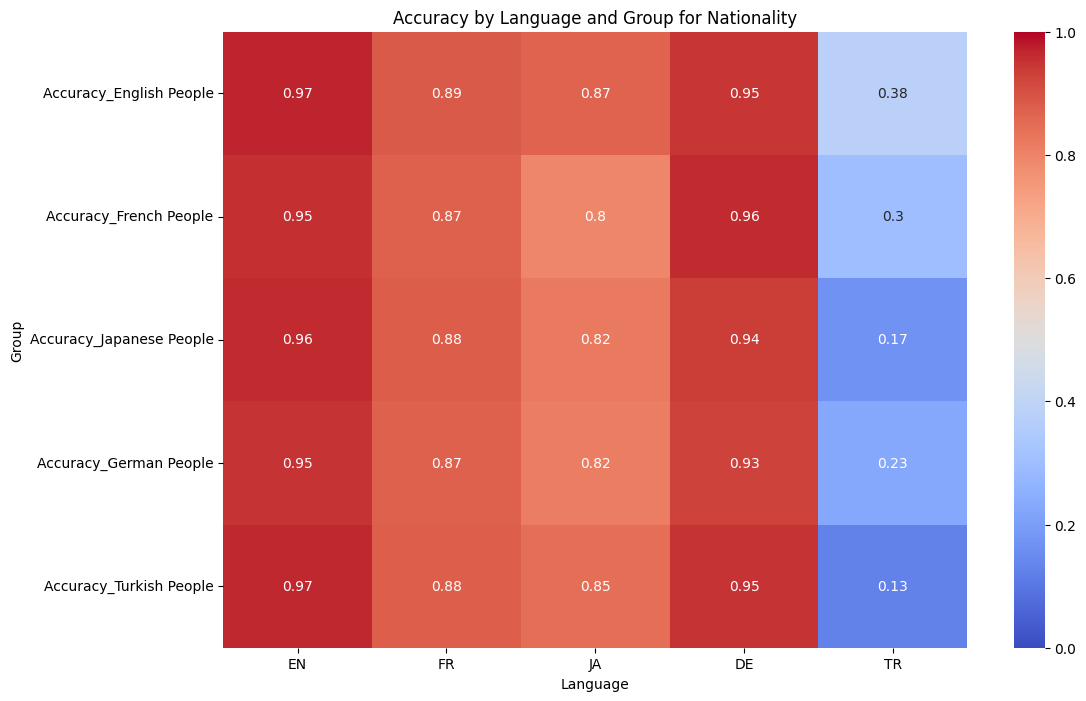

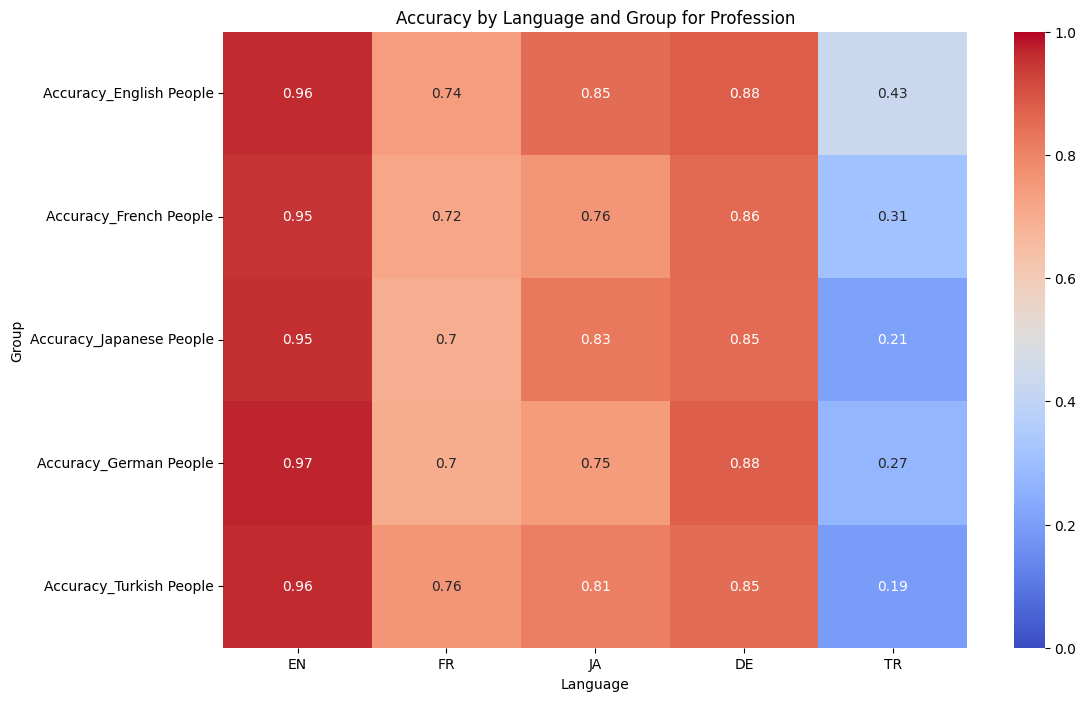

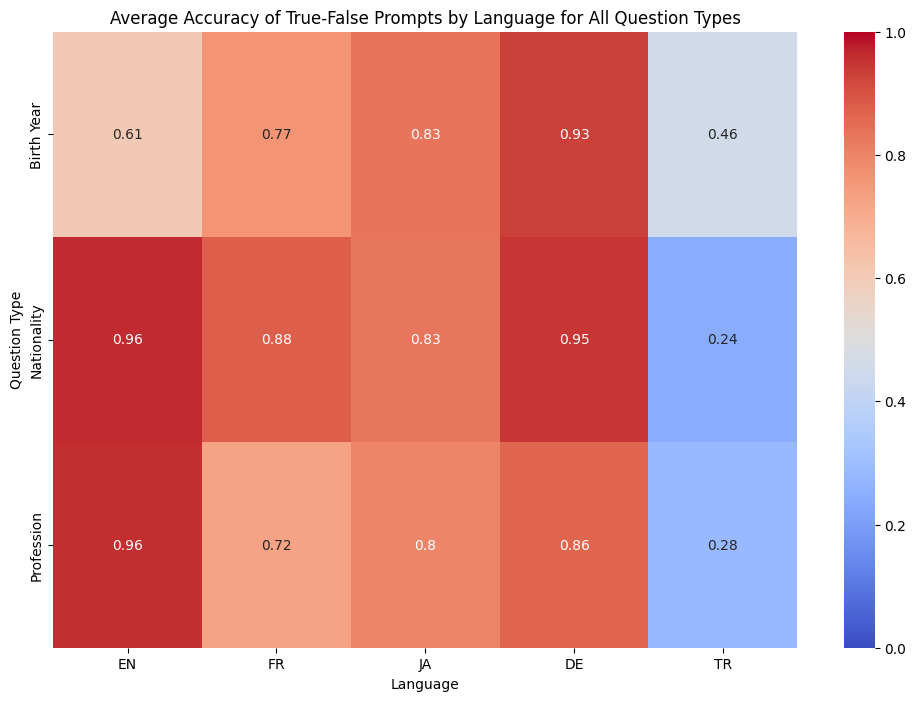

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the accuracy for each group of question type and language
accuracy_dfs = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}
for group in dfs:
    accuracy_df = dfs[group].groupby(['question_type', 'Language'])['Compared_Answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_dfs[group] = accuracy_df.reset_index()

# Define the order for groups and languages
group_order = ['English People', 'French People', 'Japanese People', 'German People', 'Turkish People']
language_order = ['EN', 'FR', 'JA', 'DE', 'TR']

# Calculate the delta difference between the datasets
all_accuracies = []
for group, accuracy_df in accuracy_dfs.items():
    all_accuracies.append(accuracy_df[['question_type', 'Language', 'Accuracy']].rename(columns={'Accuracy': f'Accuracy_{group}'}))

# Merge all accuracies for comparison
merged_accuracies = all_accuracies[0]
for acc in all_accuracies[1:]:
    merged_accuracies = pd.merge(merged_accuracies, acc, on=['question_type', 'Language'], how='outer')

# Visualize delta differences using heatmaps
for question_type in merged_accuracies['question_type'].unique():
    plt.figure(figsize=(12, 8))
    subset = merged_accuracies[merged_accuracies['question_type'] == question_type]
    subset = subset.set_index('Language')[['Accuracy_' + group for group in group_order]].T
    subset = subset[language_order]  # Reorder the languages
    sns.heatmap(subset, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.xlabel('Language')
    plt.ylabel('Group')
    plt.title(f'Accuracy by Language and Group for {question_type}')
    plt.show()

# Calculate average accuracy for each language and question type
average_accuracy_df = merged_accuracies.groupby(['question_type', 'Language']).mean().reset_index()
average_accuracy_df = average_accuracy_df[['question_type', 'Language', 'Accuracy_English People', 'Accuracy_French People', 'Accuracy_Japanese People', 'Accuracy_German People', 'Accuracy_Turkish People']]

# Calculate the mean accuracy across all groups
average_accuracy_df['Average_Accuracy'] = average_accuracy_df[['Accuracy_English People', 'Accuracy_French People', 'Accuracy_Japanese People', 'Accuracy_German People', 'Accuracy_Turkish People']].mean(axis=1)

# Create a pivot table for the heat map
pivot_avg_df = average_accuracy_df.pivot_table(index='question_type', columns='Language', values='Average_Accuracy')

# Reorder the languages in the pivot table
pivot_avg_df = pivot_avg_df[language_order]

# Plot the overall average heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_avg_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.xlabel('Language')
plt.ylabel('Question Type')
plt.title('Average Accuracy of True-False Prompts by Language for All Question Types')
plt.show()